## RGB 평균 추출

In [1]:
from utils.roi import ROIProcessor

video_path = "video/video1.mp4"
model_path = "misc/face_landmarker.task"
landmarker = ROIProcessor(video_path, model_path)
R_means_dict, L_means_dict, M_means_dict, fps = landmarker.detect_with_calculate()

I0000 00:00:1734512088.687872    6225 task_runner.cc:85] GPU suport is not available: INTERNAL: ; RET_CHECK failure (mediapipe/gpu/gl_context_egl.cc:77) display != EGL_NO_DISPLAYeglGetDisplay() returned error 0x300c
W0000 00:00:1734512088.688381    6225 face_landmarker_graph.cc:174] Sets FaceBlendshapesGraph acceleration to xnnpack by default.
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
W0000 00:00:1734512088.724123    6379 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1734512088.744016    6379 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
Processing Frames: 100%|██████████| 1200/1200 [00:52<00:00, 22.91frame/s]


In [12]:
from utils.ppg import PPG_G, PPG_C

R_ROI_G_PPG = PPG_G(R_means_dict, fps).compute_signal()
print("R_ROI_G_PPG: ", len(R_ROI_G_PPG))

R_ROI_C_PPG = PPG_C(R_means_dict, fps).compute_signal()
print("R_ROI_C_PPG: ", len(R_ROI_C_PPG))

L_ROI_G_PPG = PPG_G(L_means_dict, fps).compute_signal()
print("L_ROI_G_PPG: ", len(L_ROI_G_PPG))

L_ROI_C_PPG = PPG_C(L_means_dict, fps).compute_signal()
print("L_ROI_C_PPG: ", len(L_ROI_C_PPG))

M_ROI_G_PPG = PPG_G(M_means_dict, fps).compute_signal()
print("M_ROI_G_PPG: ", len(M_ROI_G_PPG))

M_ROI_C_PPG = PPG_C(M_means_dict, fps).compute_signal()
print("M_ROI_C_PPG: ", len(M_ROI_C_PPG))

R_ROI_G_PPG:  1200
R_ROI_C_PPG:  1200
L_ROI_G_PPG:  1200
L_ROI_C_PPG:  1200
M_ROI_G_PPG:  1200
M_ROI_C_PPG:  1200


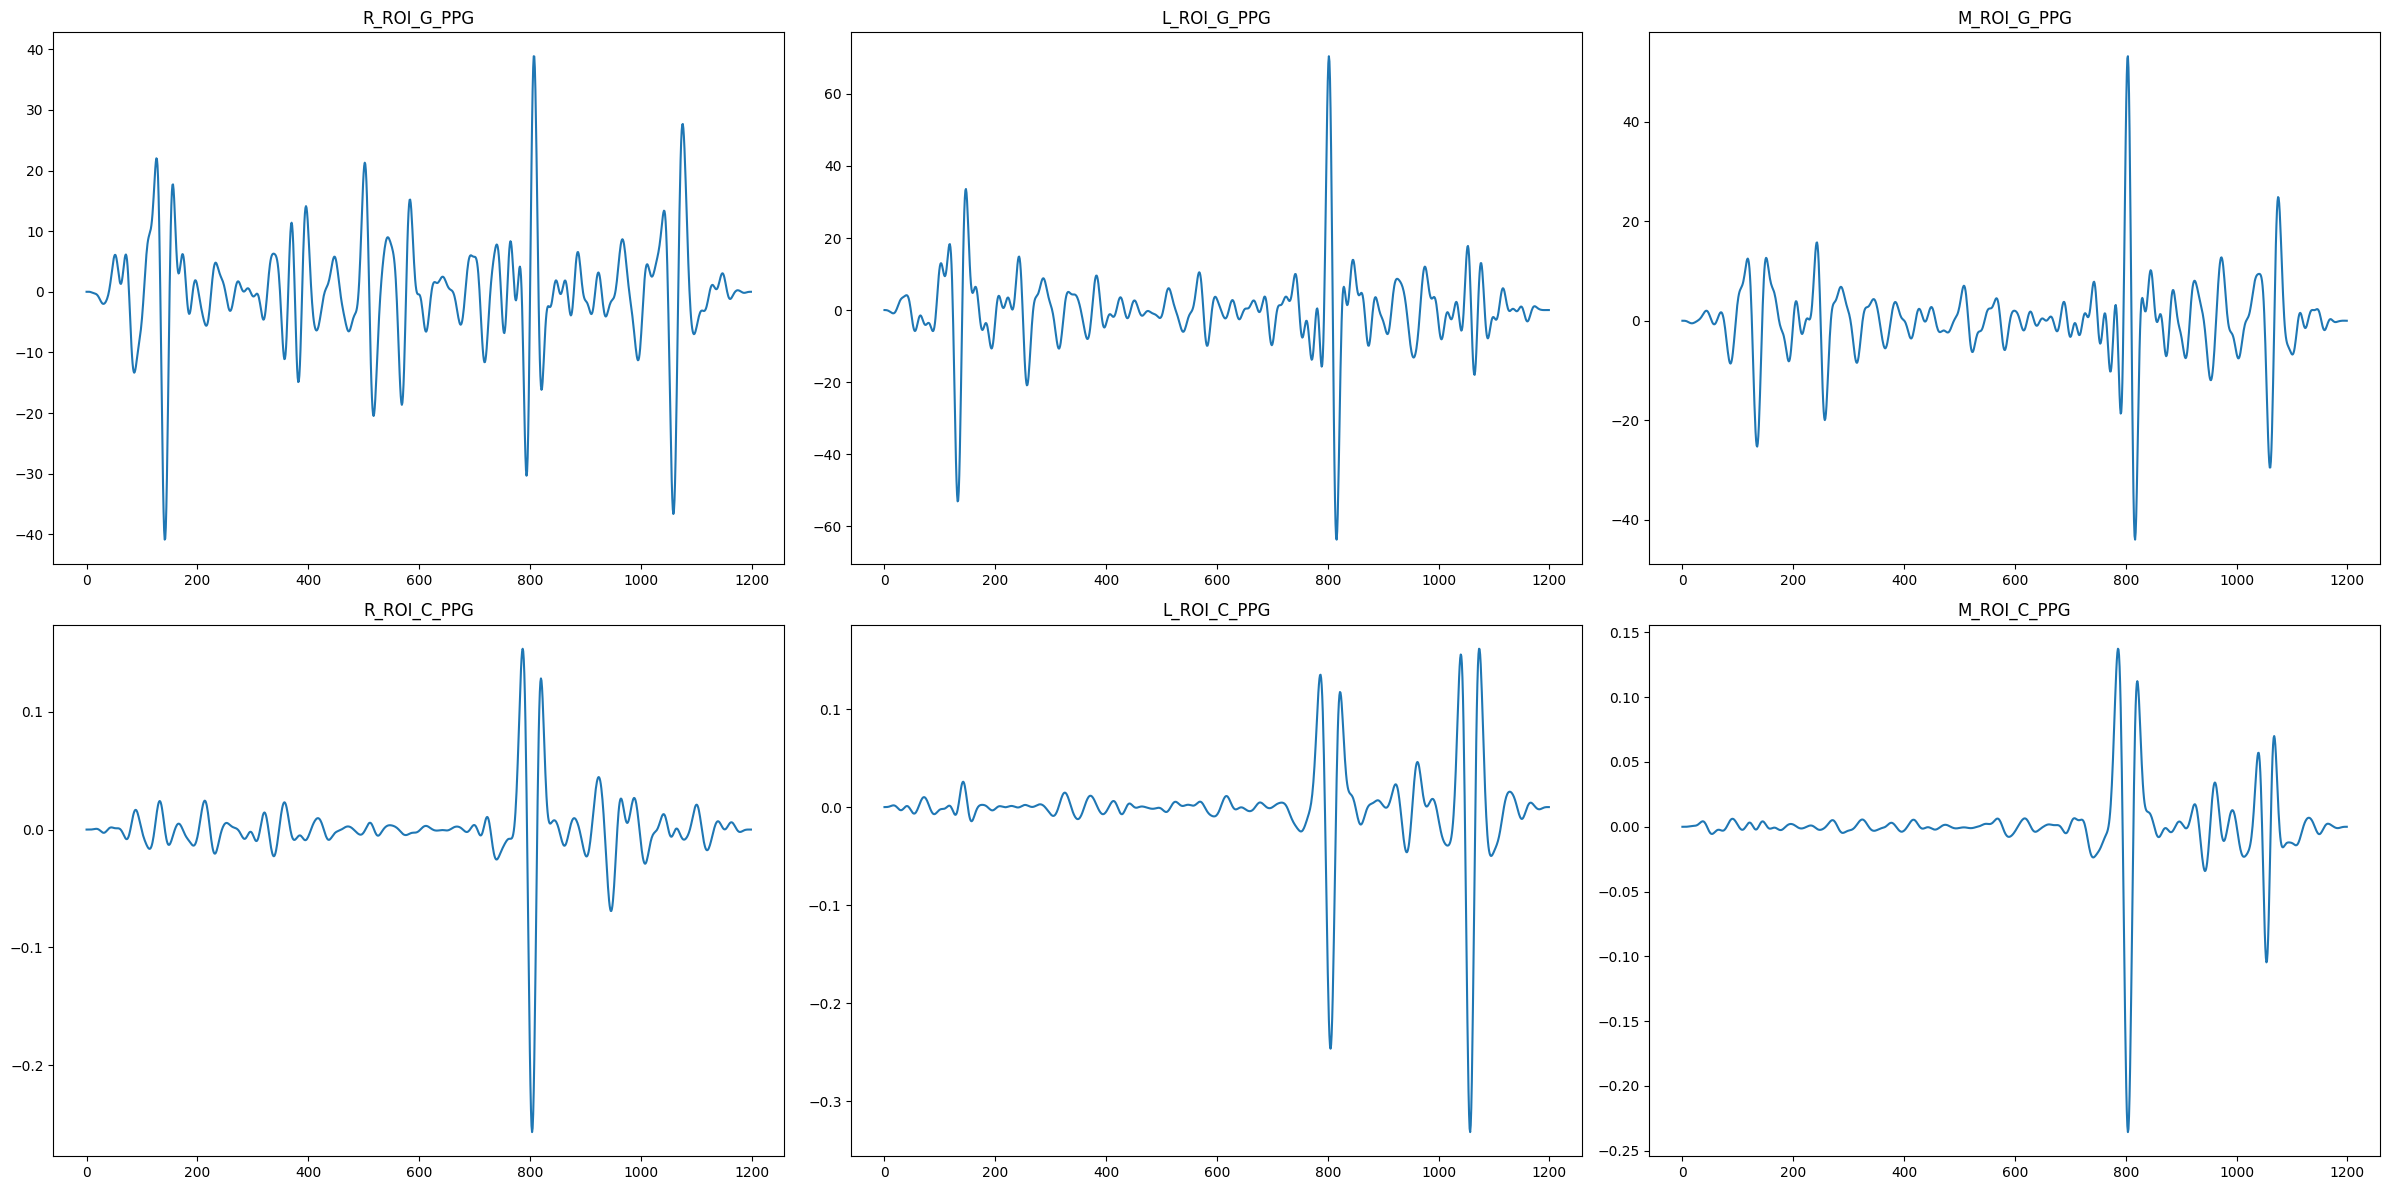

In [14]:
import matplotlib.pyplot as plt

# Create a 2x3 grid of subplots (2 rows and 3 columns)
fig, axs = plt.subplots(2, 3, figsize=(24, 12))

# Plot data on the subplots
axs[0, 0].plot(R_ROI_G_PPG)
axs[0, 0].set_title('R_ROI_G_PPG')

axs[0, 1].plot(L_ROI_G_PPG)
axs[0, 1].set_title('L_ROI_G_PPG')

axs[0, 2].plot(M_ROI_G_PPG)
axs[0, 2].set_title('M_ROI_G_PPG')

axs[1, 0].plot(R_ROI_C_PPG)
axs[1, 0].set_title('R_ROI_C_PPG')

axs[1, 1].plot(L_ROI_C_PPG)
axs[1, 1].set_title('L_ROI_C_PPG')

axs[1, 2].plot(M_ROI_C_PPG)
axs[1, 2].set_title('M_ROI_C_PPG')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


## PPG MAP 추출

In [1]:
from utils.roi import ROIProcessor
from utils.ppg import PPG_MAP

video_path = "video/video1.mp4"
model_path = "misc/face_landmarker.task"
landmarker = ROIProcessor(video_path, model_path)
transformed_frames, fps = landmarker.detect_with_map()
ppg_map = PPG_MAP(transformed_frames, fps).compute_map()

I0000 00:00:1734748082.822478   19611 task_runner.cc:85] GPU suport is not available: INTERNAL: ; RET_CHECK failure (mediapipe/gpu/gl_context_egl.cc:77) display != EGL_NO_DISPLAYeglGetDisplay() returned error 0x300c
W0000 00:00:1734748082.822984   19611 face_landmarker_graph.cc:174] Sets FaceBlendshapesGraph acceleration to xnnpack by default.
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
W0000 00:00:1734748082.864142   19768 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1734748082.886944   19781 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
Processing Frames: 100%|██████████| 1200/1200 [01:27<00:00, 13.72frame/s]


In [4]:
ppg_map.shape

(64, 1200)

In [5]:
ppg_map

array([[149., 149., 149., ..., 149., 149., 149.],
       [  1.,   2.,   3., ...,   2.,   3.,   2.],
       [117., 117., 117., ..., 117., 117., 117.],
       ...,
       [  0.,   3.,  10., ...,   8.,  10.,   3.],
       [139., 139., 139., ..., 139., 139., 139.],
       [  0.,   4.,   9., ...,   5.,   9.,   4.]])